## Introduction

This notebook explains how-to prototype a multilingual conversational model based in different components. It is part of the subject NLP and conversational models. The objectives of this hands-on are:
- Understand solution design components
- Understand how to integrate different AI components, including training and runtime phases
- Understand how to evaluate a potential AI solution based in different components

## Scenario

Our organization, an airline company, wants to explore of the idea of implementing a conversational model in two languages: English and the local language. In order to evaluate the feasibility of the idea, we are going to build a prototype that would test the idea and evaluates the feasibility.

Conversational model should be able to answer two questions:
- Can I cancel my ticket and get a refund?

*The option to cancel depends on your ticket fare. Basic fare is subject to restrictions and it is not allow to get a refund. If you bought a flexible fare, you should be able to get a refund in our website*


- How many items/kilos of luggage can I check in?

The number of items depends on your ticket fare. Basic fare includes a cabin luggage. If you would like to bring more luggage with you, you can manage your booking in our website



##Design: potential solution

The prototype will have the following components:
- Front-end. Front-end will be delivered with [Gradio](https://gradio.app/), an easy way to create interfaces
- Translation service - [Google Translation AI](https://cloud.google.com/translate)
- Conversational Engine - [Google Dialogflow ](https://cloud.google.com/dialogflow)

## Build: technical execution

### Libraries

In [2]:
!pip install gradio
!pip install google-cloud-dialogflow
!pip install google-cloud-translate==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.0
    Uninstalling cachetools-5.3.0:
      Successfully uninstalled cachetools-5.3.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.17.3
    Uninstalling google-auth-2.17.3:
      Successfully uninstalled google-auth-2.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.0
    Uninstalling google-api-core-2.11.0:
      Successfully uninstalled google-api-core-2.11.0
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 2.3.2
    Uninstalling google-cl

In [1]:
from google.cloud import dialogflow
import uuid

In [2]:
from google.cloud import translate_v2 as translate

### First MVP: conversational model able to handle conversations in one language

Our first MVP is going to be a conversional model able to handle conversations in English. Let's start building a first version of the conversational model.

Google Dialogflow is a service that enable our applications with Conversational AI. First, let's build a simple conversational model based in https://dialogflow.cloud.google.com/

#### Conversational flows design and implementation

We will create two intents, one for each of the type of question we could get from the user, adding training examples and the response

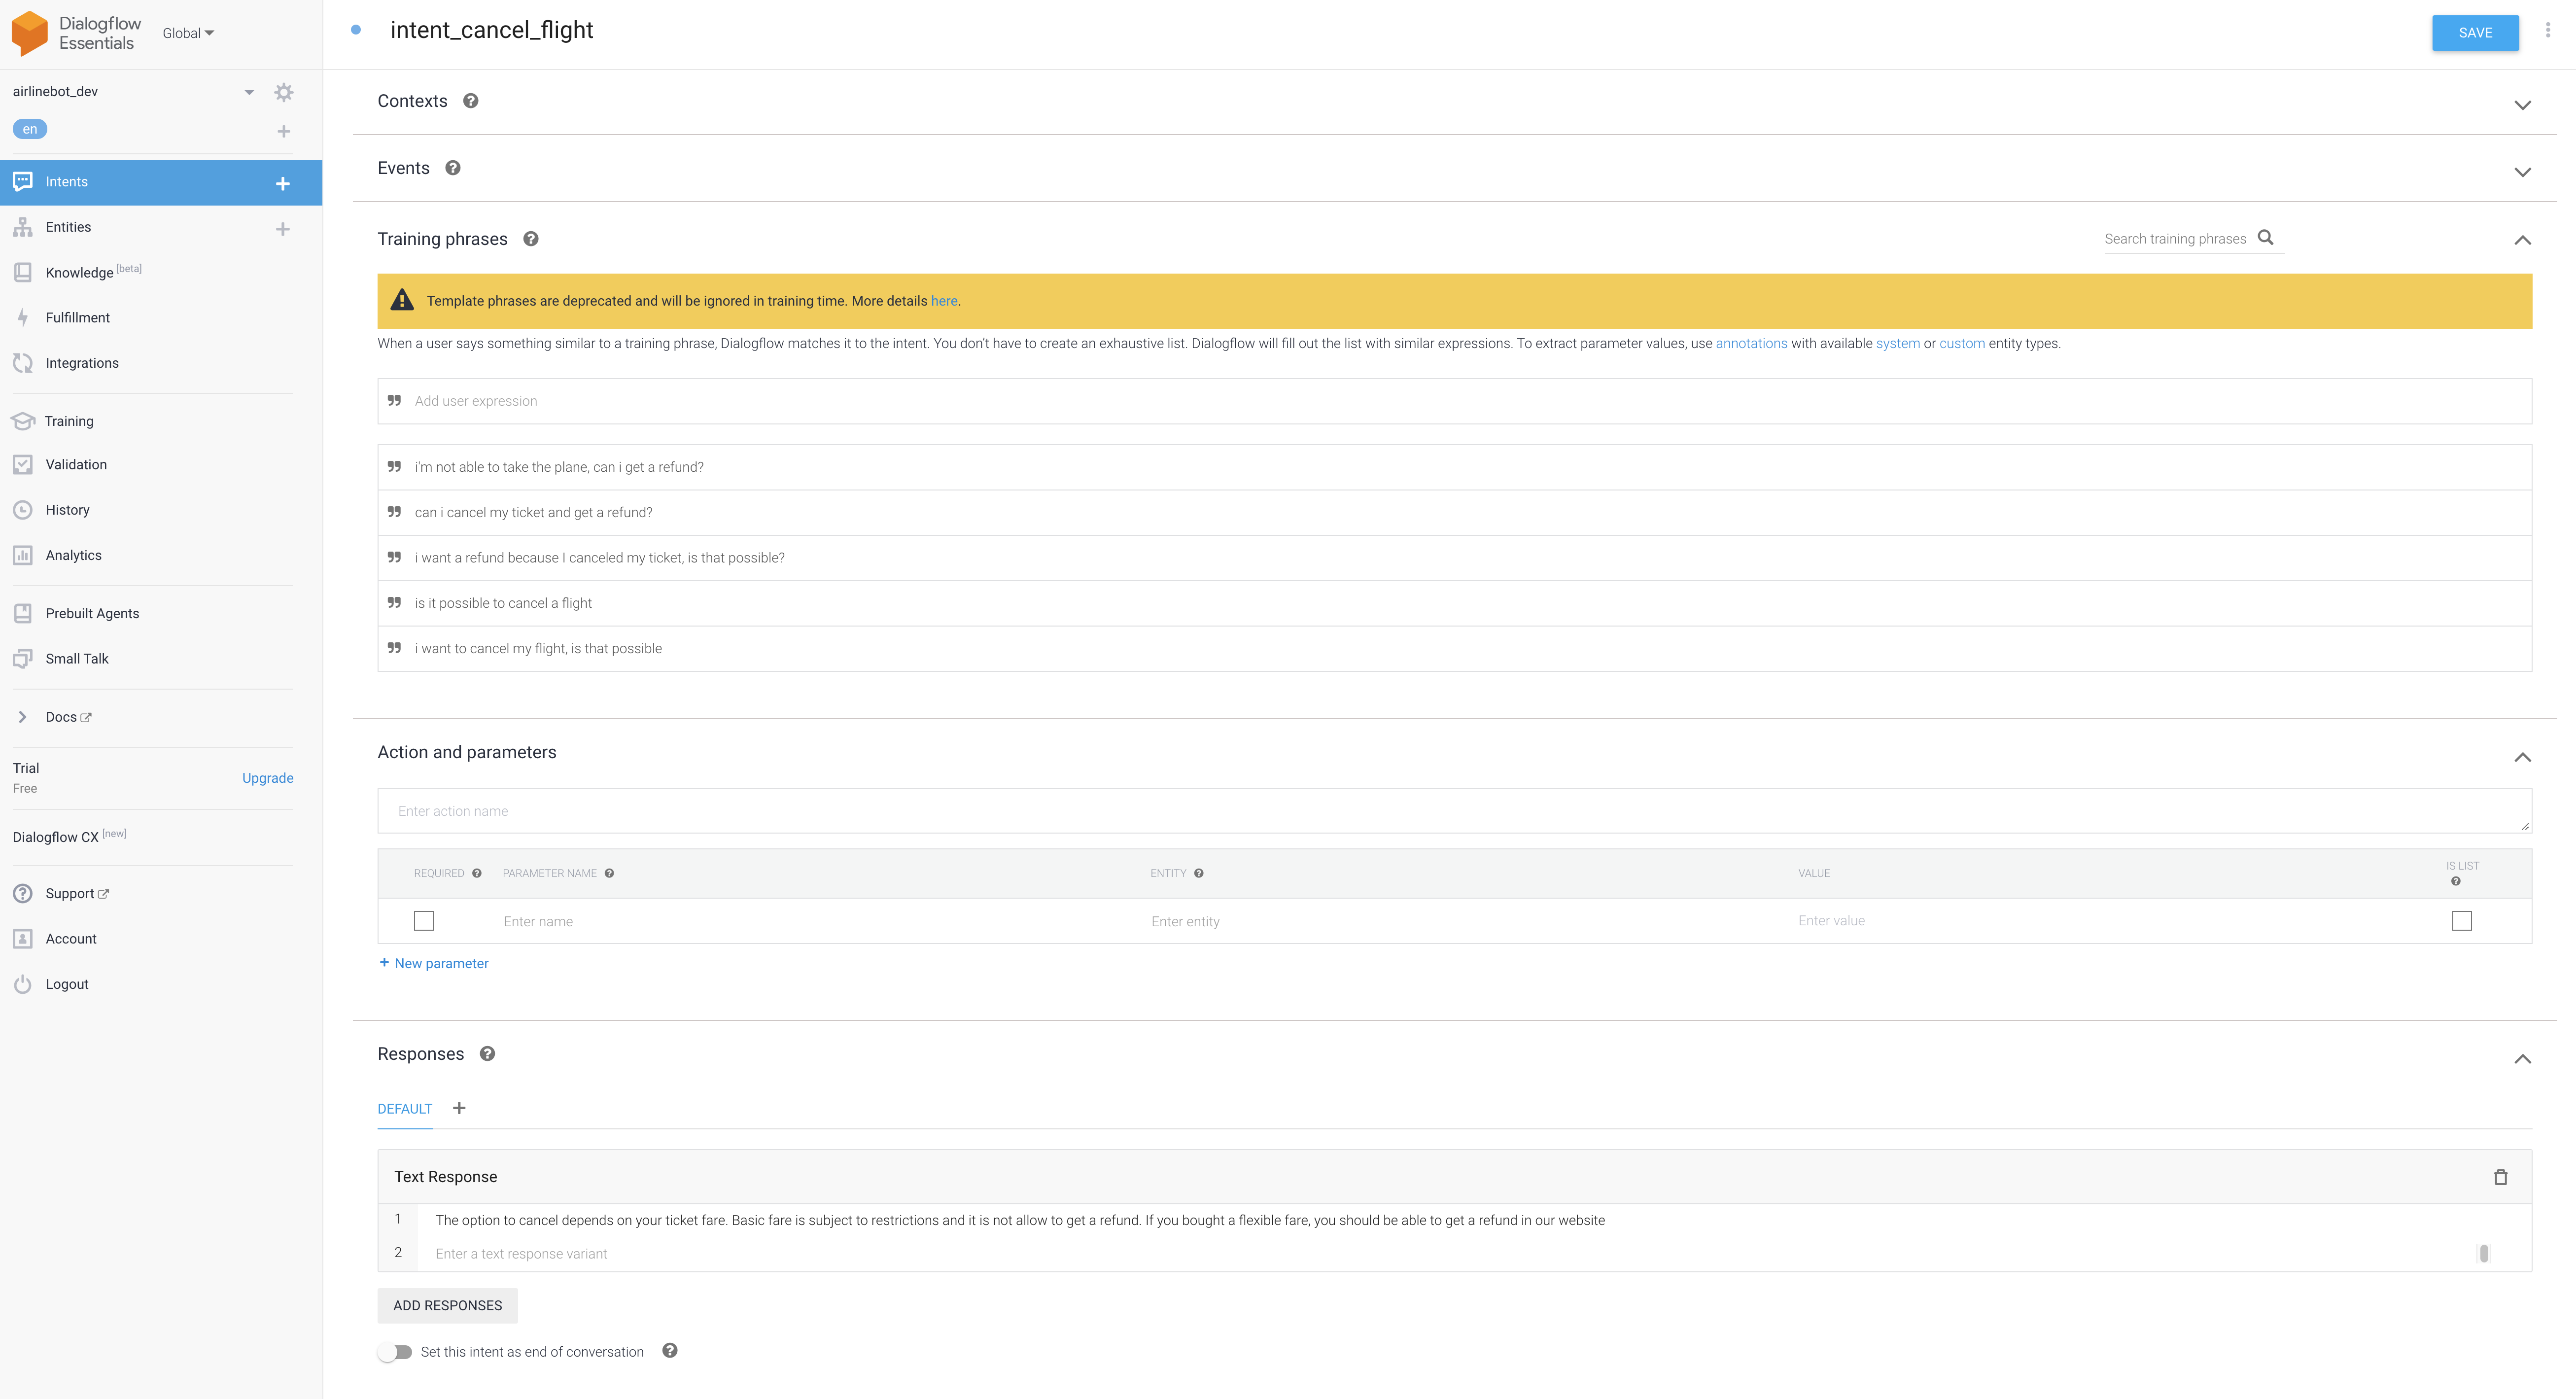

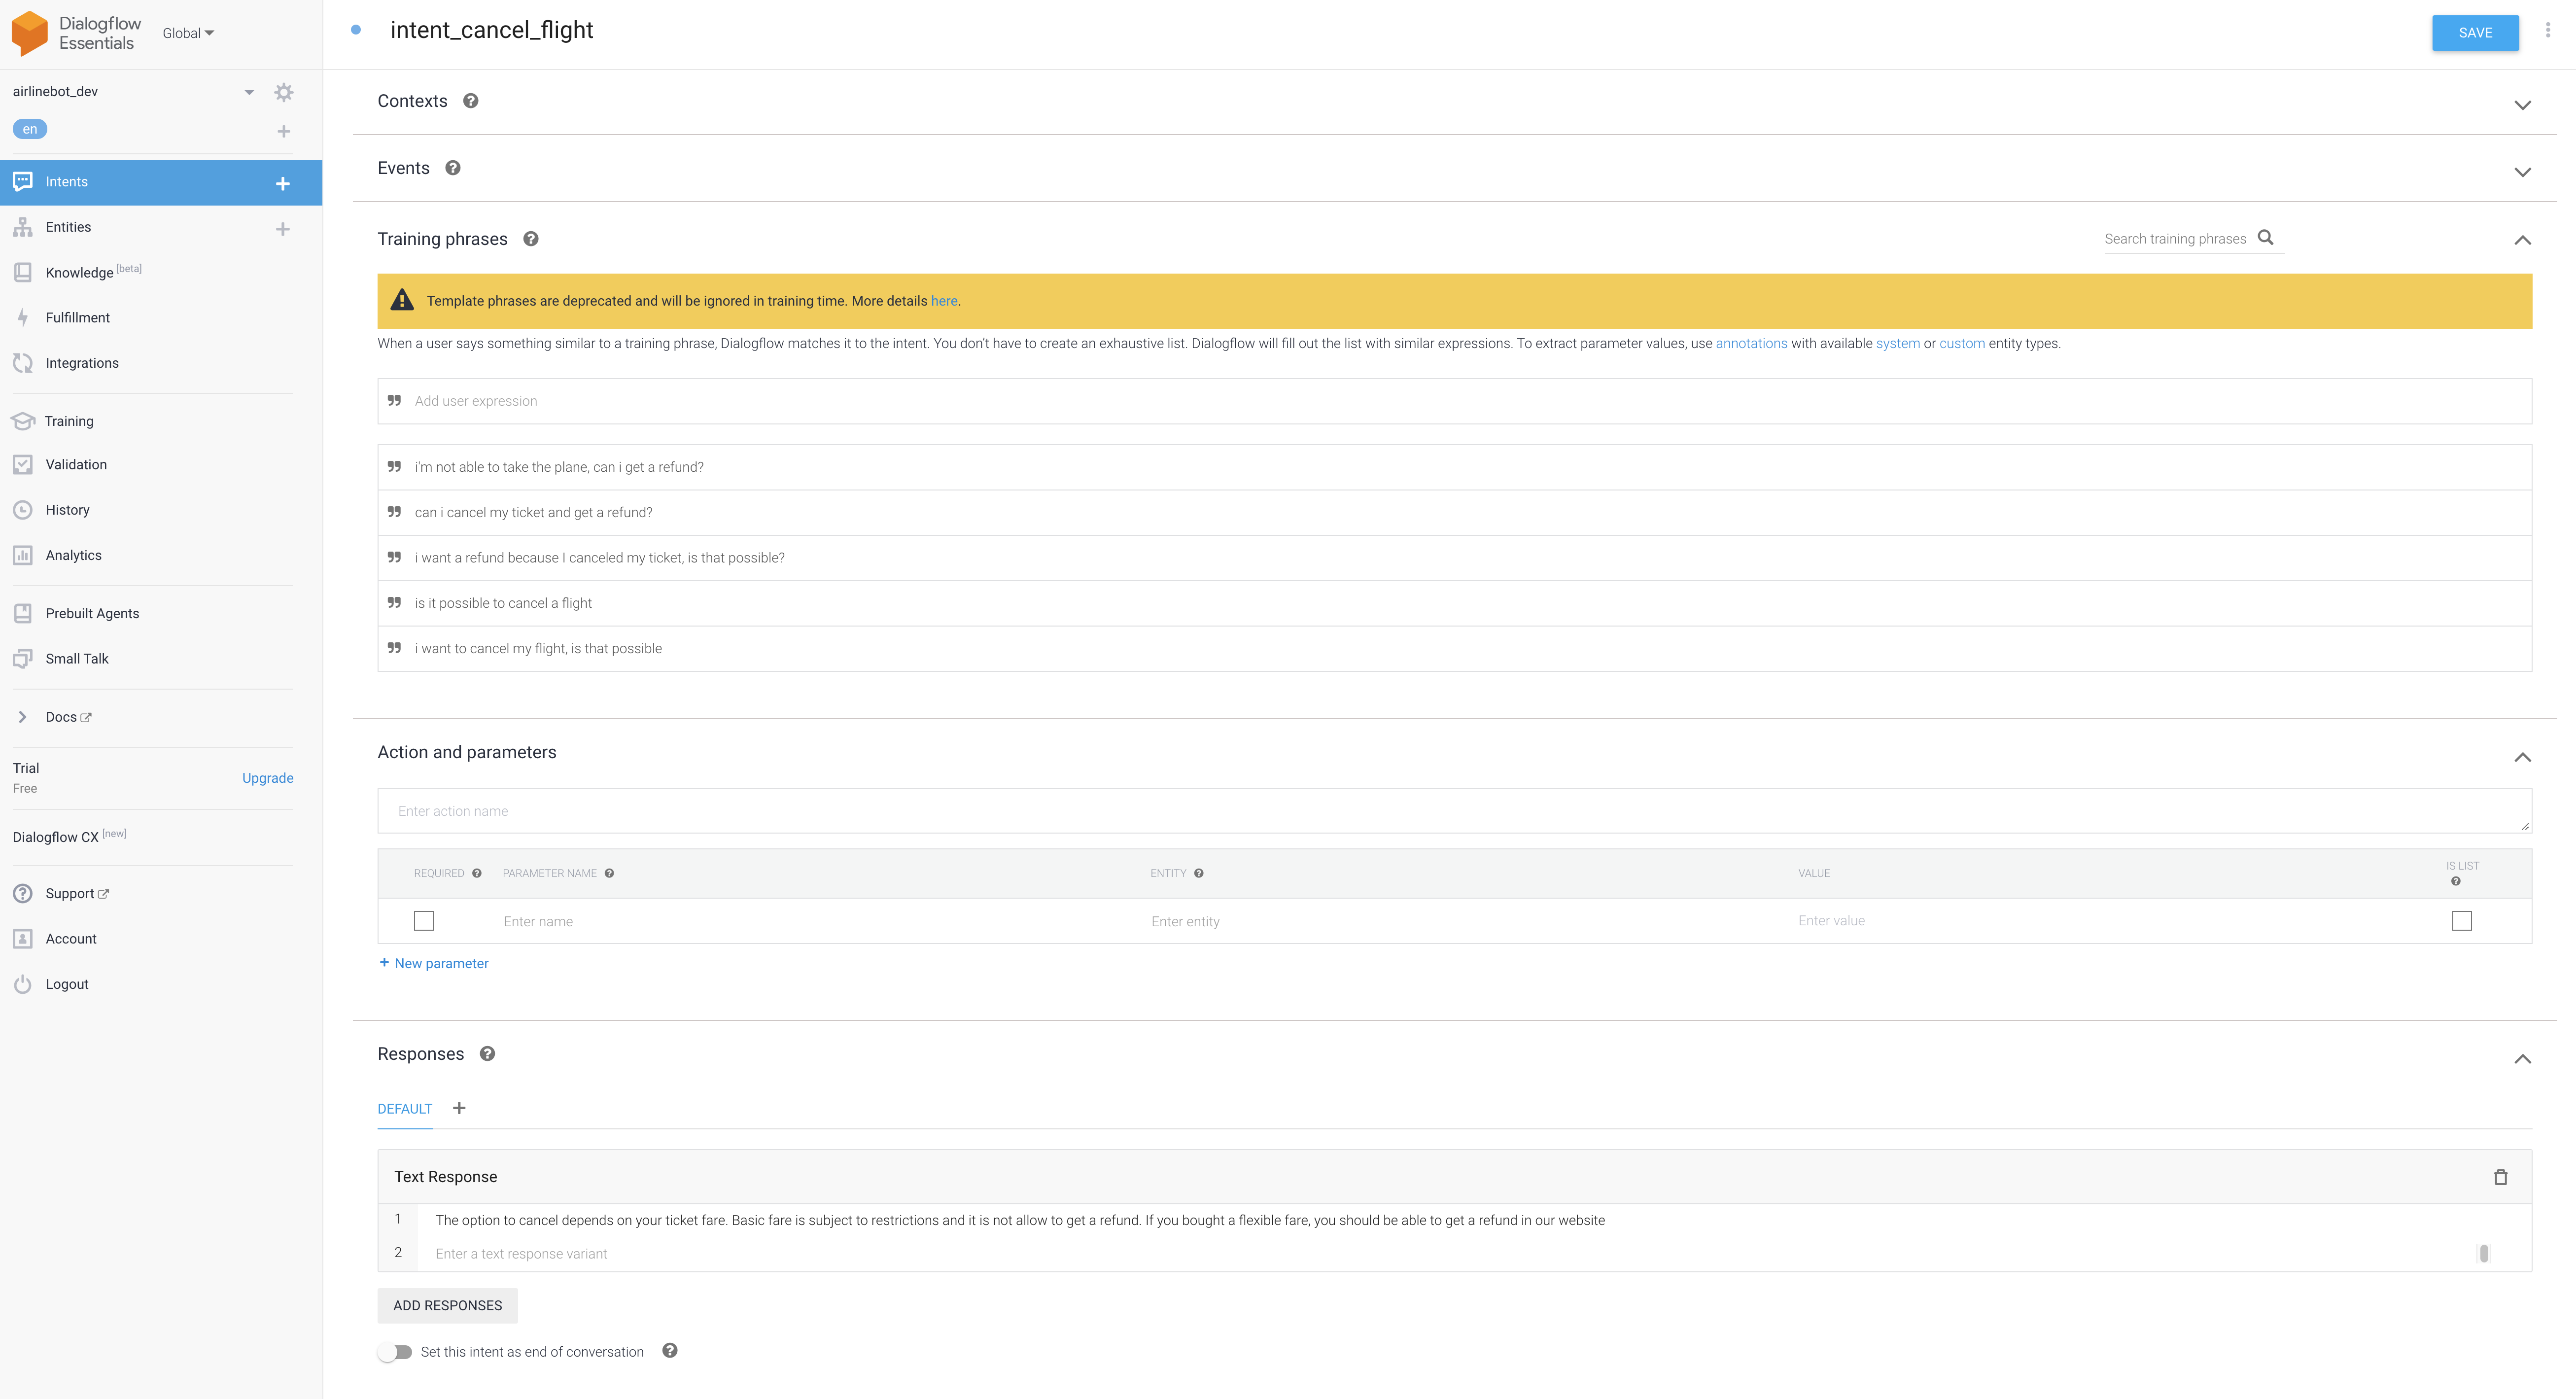

#### Let's test our conversational engine!

First of all, we have to enable the Dialogflow API in Google Cloud Console
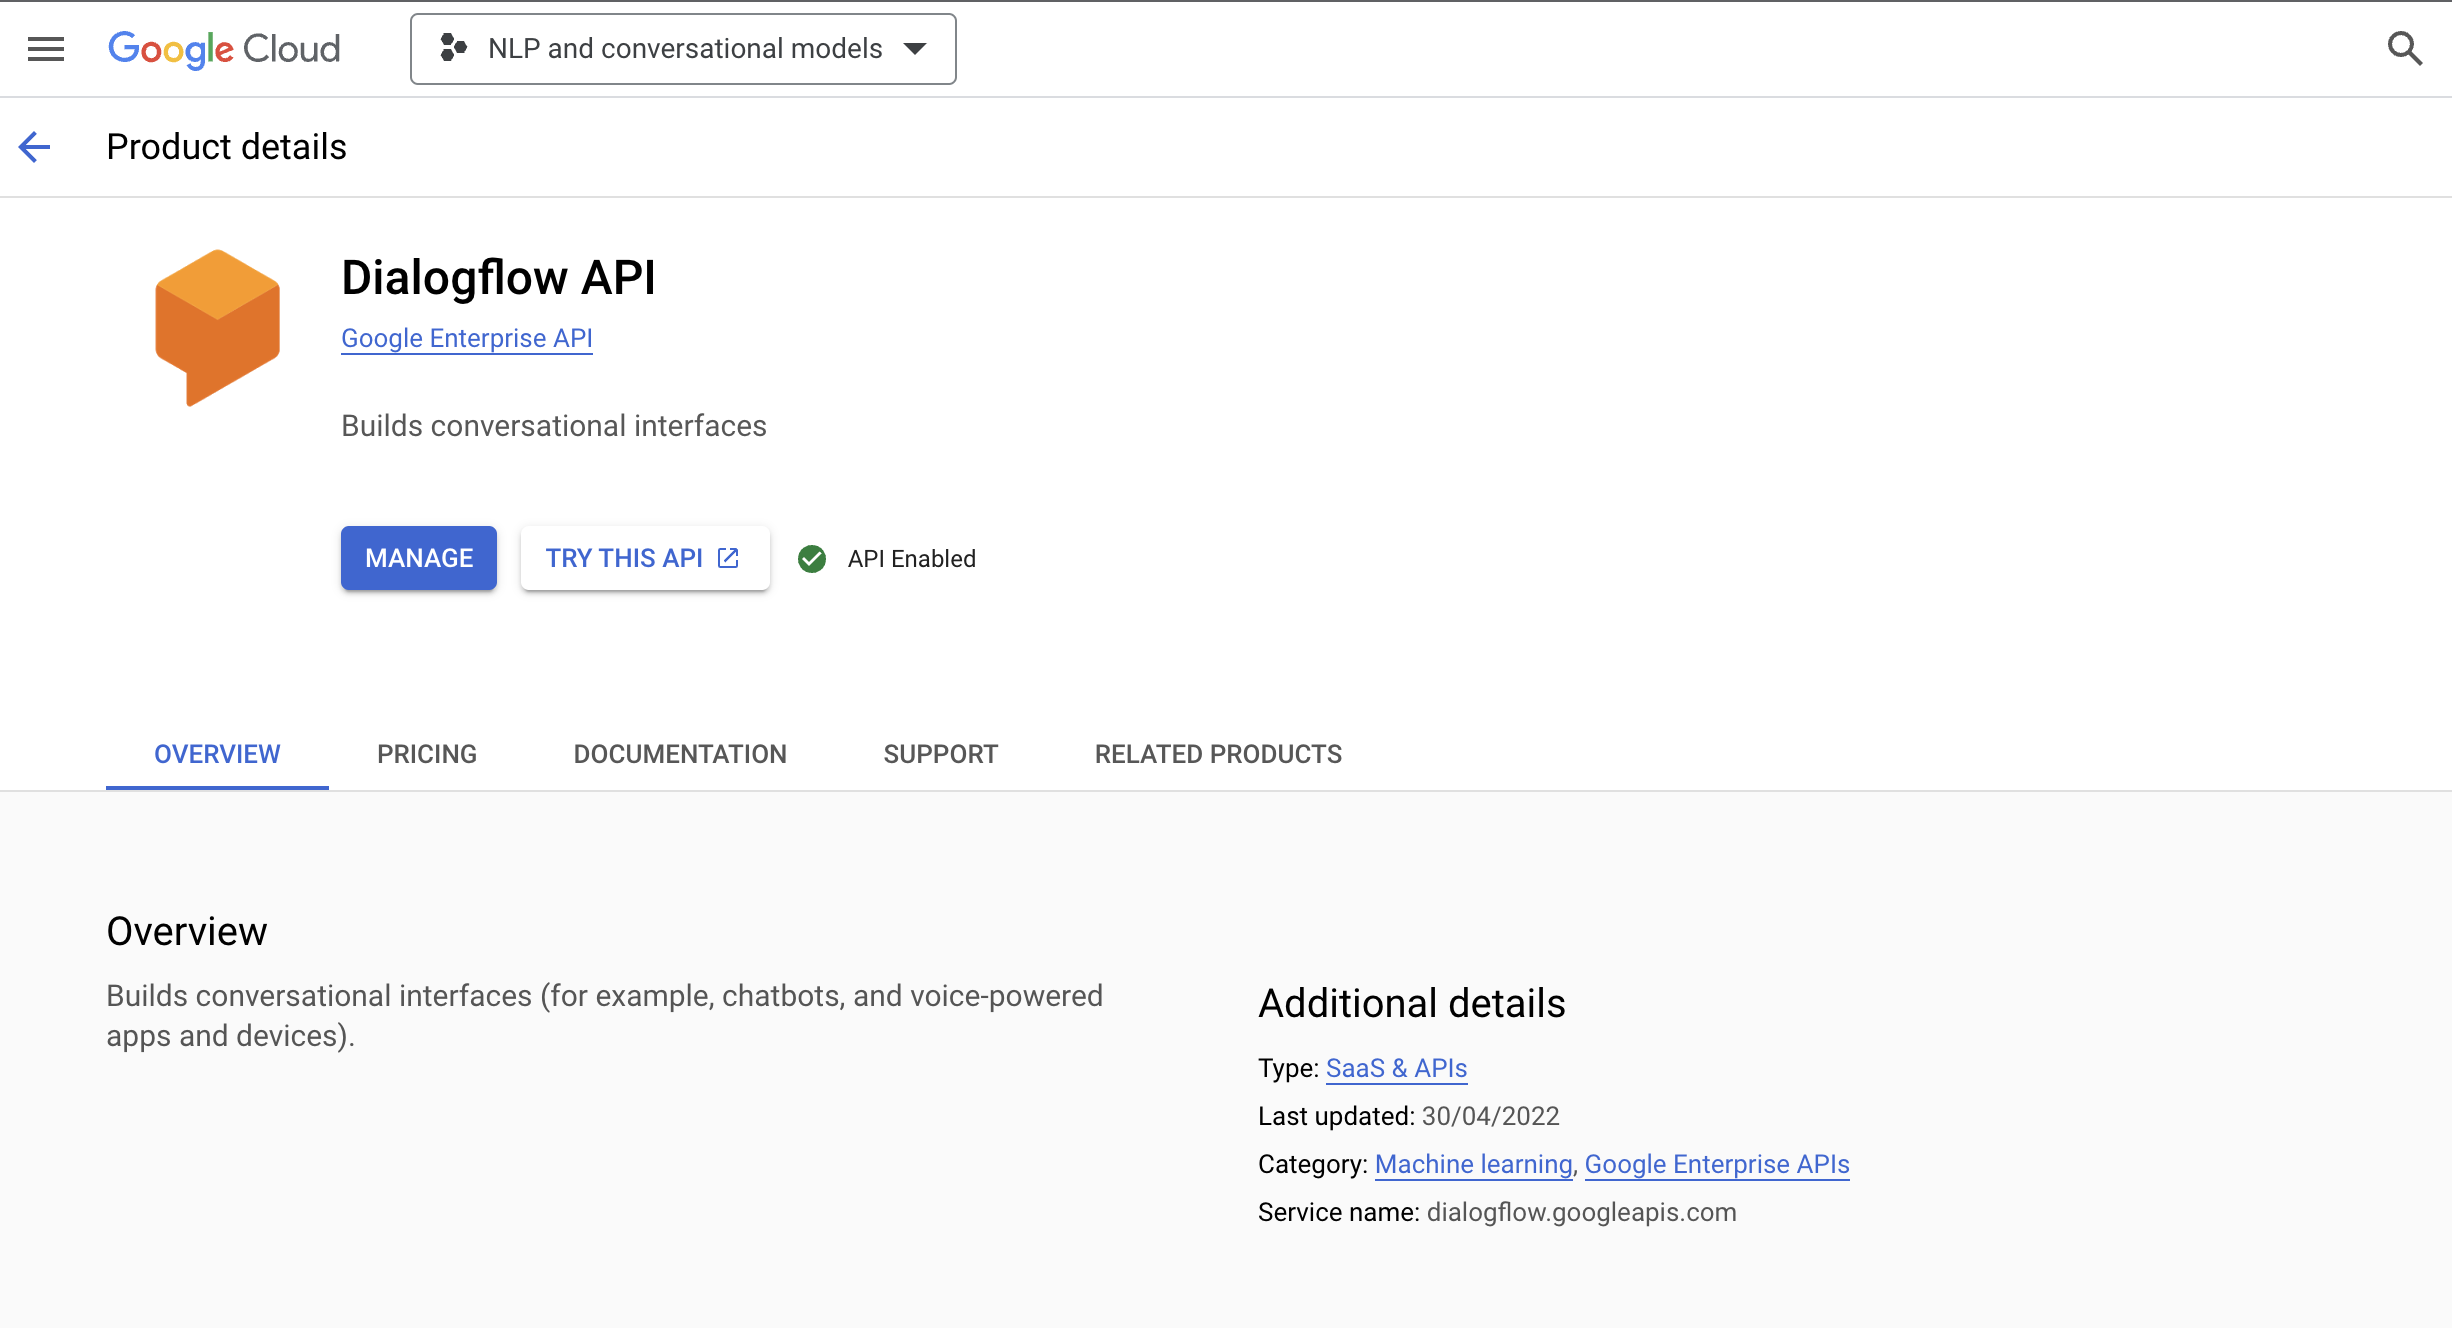

##### **Authentication**


In order to use the API, we have to create the credentials:

1. Go to the [Service Accounts page](https://console.cloud.google.com/iam-admin/serviceaccounts?walkthrough_id=iam--create-service-account-keys&start_index=1&_ga=2.52163113.1471148981.1684858685-1101262998.1684858685#step_index=1) 
2. Select the project in which you have enabled the API and created the agent
3. Select the e-mail address
4. Under keys, choose 'Add key' and JSON format
5. You will get a JSON file in your computer.
6. Upload the file to the same location where the notebook is located (File>Locate in Drive)


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('/content/drive/My Drive/NLP/nlp-assignment-ngvp-d0cc5c64fe52.json')
#Example of path + name: '/content/drive/My Drive/Colab Notebooks/Assignment/credentials.json'

On the other hand, we should give 'Dialogflow API Admin' Role to our service account:
1. In the GCP project, go to the IAM configuration dashboard
2. Select the service account in which you create the credentials
3. Add the 'Dialogflow API Admin' Role to the account

##### **Send a message to Dialogflow**

In order to make a request to Dialogflow, we have consider some important parameters. Let's go one by one.

**Session**

A session represents a conversation between a Dialogflow agent and an end-user. You create a session at the beginning of a conversation and use it for each turn of the conversation. Once the conversation has ended, you discontinue using the session.

You should not use the same session for concurrent conversations with different end-users. A session remains active and its data is stored for 30 minutes after the last request is sent for the session.

Each session is determined unique by a session ID generated by your system. You create a new session by providing a new session ID in a detect intent request and other session methods. A session ID is a string of at most 36 bytes in size. Your system is responsible for generating unique session IDs. They can be random numbers, hashed end-user identifiers, or any other values that are convenient for you to generate.

https://cloud.google.com/dialogflow/cx/docs/concept/session


In [5]:
session_id = uuid.uuid4().hex

**Project ID**

We must identify the project in which we have enabled the Dialogflow API and created our conversational model

In [6]:
project_id = "nlp-assignment-ngvp"

**Language code**

We should identify the language we would like to make the request to. In our case, it will be English


In [7]:
language_code = 'en'

**Request**

In [8]:
#message we want to send
text = "hello"

In [9]:
#create the session client with the credentials
session_client = dialogflow.SessionsClient(credentials=credentials)

session = session_client.session_path(project_id, session_id)

In [10]:
#create the text and query input object - query to be processed
text_input = dialogflow.TextInput(text=text, language_code=language_code)
query_input = dialogflow.QueryInput(text=text_input)
query_input

text {
  text: "hello"
  language_code: "en"
}

In [11]:
#request to Dialogflow
response = session_client.detect_intent(
        request={"session": session, "query_input": query_input}
    )
response

response_id: "dfbcd104-4510-441f-b01f-af8fa596b107-4c6e80df"
query_result {
  query_text: "hello"
  action: "input.welcome"
  parameters {
  }
  all_required_params_present: true
  fulfillment_text: "Good day! What can I do for you today?"
  fulfillment_messages {
    text {
      text: "Good day! What can I do for you today?"
    }
  }
  intent {
    name: "projects/nlp-assignment-ngvp/agent/intents/c0be819c-f98b-42f9-8053-2e4242fb69e9"
    display_name: "Default Welcome Intent"
  }
  intent_detection_confidence: 1.0
  language_code: "en"
}

#### Front-end integration



Now we have a first version of our conversational model, ew are going to integrate it with our front-end, based in Gradio.

[Gradio](https://gradio.app/quickstart/) enables data scientists and developers to build interactive apps in order to test out your ML projects. We are going to create a user interface for bots and connect it with our Dialogflow system.

#####Conversational model interface

The following code creates an interface for a chatbot that returns three random messages as an answer. In order to interact with our chatbot, we can use the interface inside the notebook or the link created. Source: https://gradio.app/creating-a-chatbot/

In [12]:
import gradio as gr
import random
import time

In [13]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.Button("Clear")

    def respond(message, chat_history):
        bot_message = random.choice(["How are you?", "I love you", "I'm very hungry"])
        chat_history.append((message, bot_message))
        time.sleep(1)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

If we analyse the code, magic happens in 'respond' function. We should add our logic in that function.
We are going to define a methof that should be able to handle the input request and send the message to Dialogflow
Regarding auth and session, we are using the cells defined in 'Authentication'

In [14]:
def dialogflow_request(text, language_code):
    text_input = dialogflow.TextInput(text=text, language_code=language_code)
    query_input = dialogflow.QueryInput(text=text_input)
    response = session_client.detect_intent(
        request={"session": session, "query_input": query_input}
    )
    return response

In [15]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.Button("Clear")

    def respond(message, chat_history):
        #We add our function
        response = dialogflow_request(message, 'en')
        #We get the answer from the response of Dialogflow
        bot_message = str(response.query_result.fulfillment_messages[0].text.text[0])
        chat_history.append((message, bot_message))
        time.sleep(1)
        return "", chat_history

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

At this point, we have our first MVP done!

### Second MVP: conversational model able to handle conversations in two languages

Now, we should add a Translation Service to our conversational model. Let's explore Translation API before

#### Exploring Translation Service

FIrst of all, we should enable the Translation API and give our service account the right permissions. We have to follow the same steps we followed for Google Dialogflow

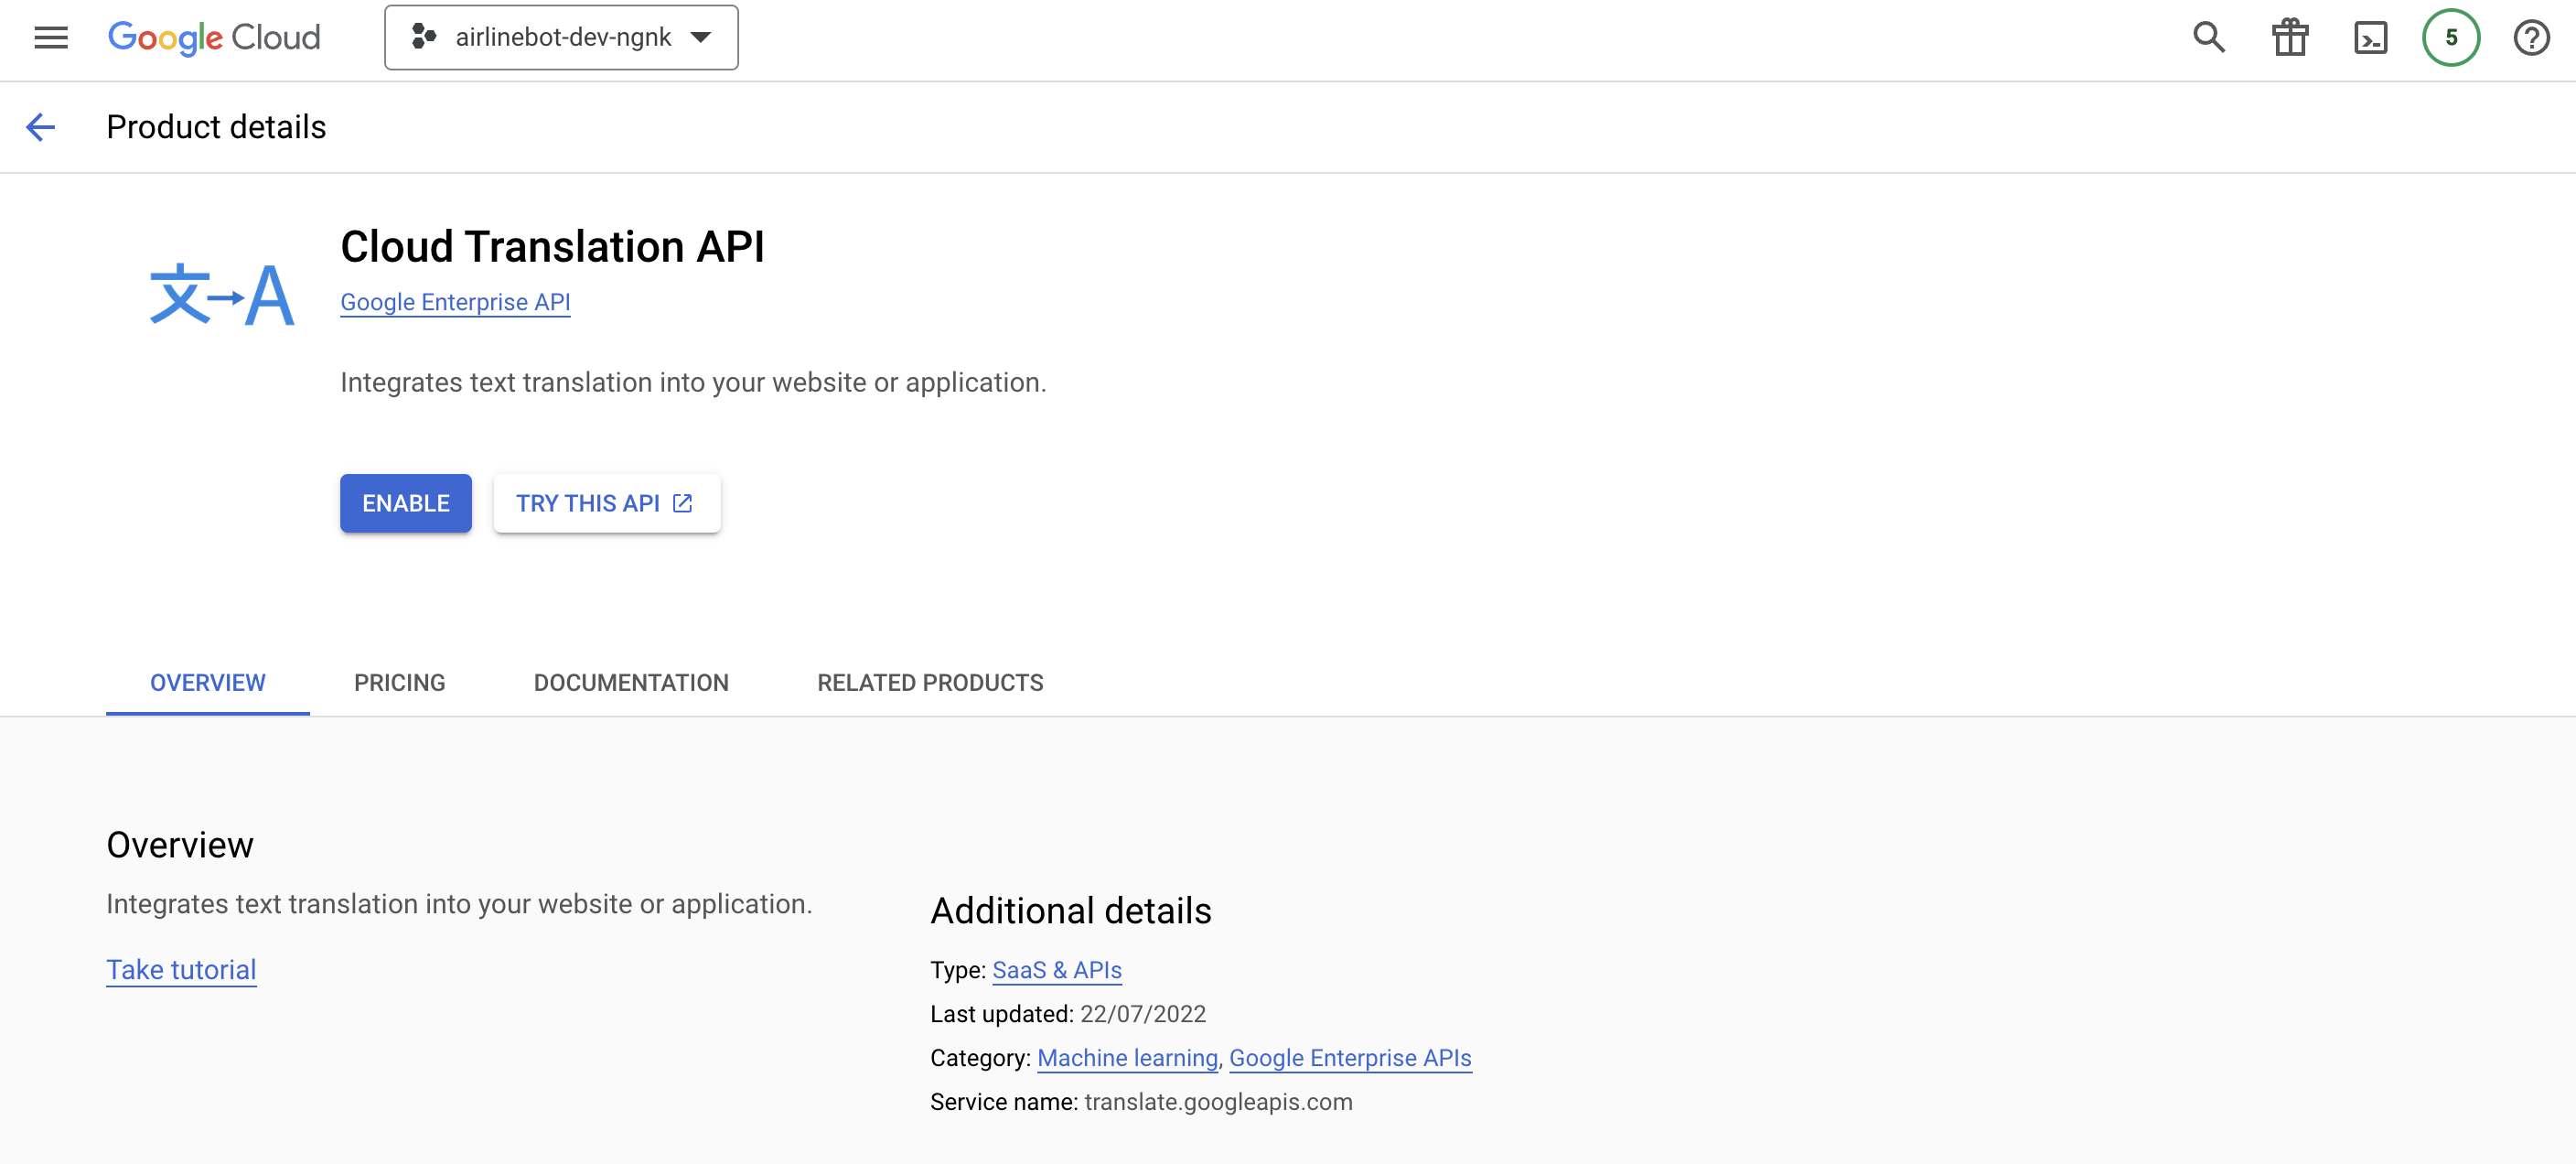

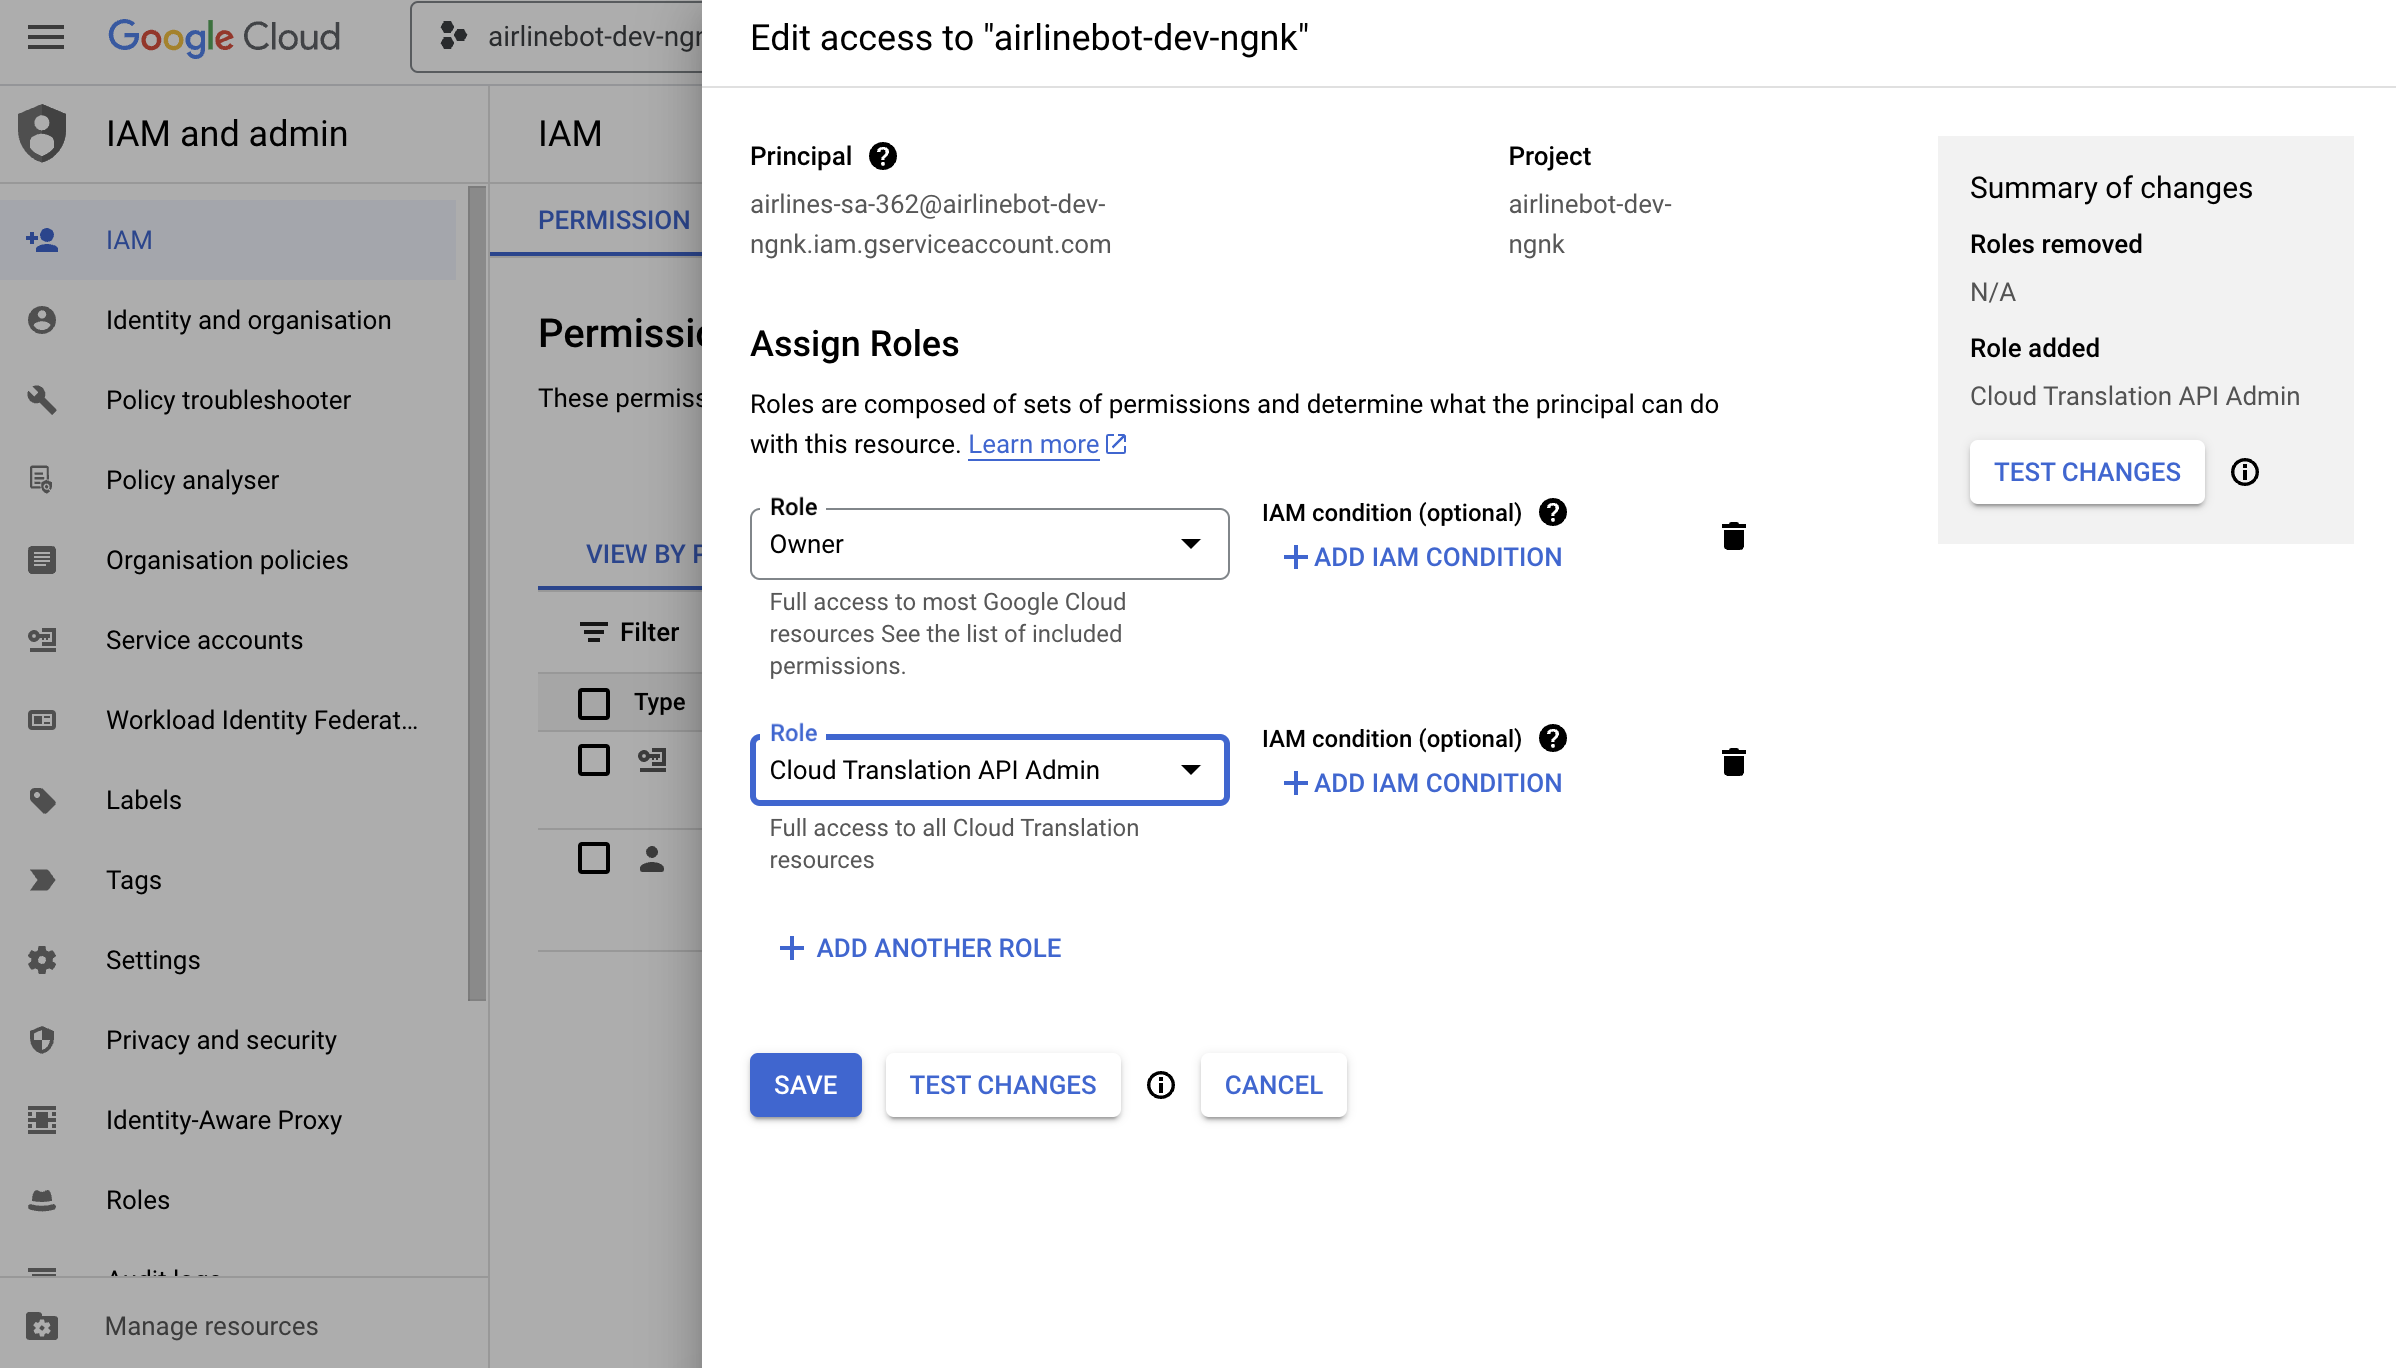

Now, we are all set to start testing the service. The following snippet makes a request to Translate service

In [17]:
text = 'can I bring more luggage with me?'
target = 'es'

In [18]:
translate_client = translate.Client(credentials=credentials)

if isinstance(text, bytes):
  text = text.decode("utf-8")

# Text can also be a sequence of strings, in which case this method
# will return a sequence of results for each text.
result = translate_client.translate(text, target_language=target)

print("Text: {}".format(result["input"]))
print("Translation: {}".format(result["translatedText"]))
print("Detected source language: {}".format(result["detectedSourceLanguage"]))
print (result)

Text: can I bring more luggage with me?
Translation: ¿Puedo llevar más equipaje conmigo?
Detected source language: en
{'translatedText': '¿Puedo llevar más equipaje conmigo?', 'detectedSourceLanguage': 'en', 'input': 'can I bring more luggage with me?'}


In [19]:
text = '¿Puedo llevar más equipaje conmigo?'
target = 'en'

In [20]:
translate_client = translate.Client(credentials=credentials)

if isinstance(text, bytes):
  text = text.decode("utf-8")

# Text can also be a sequence of strings, in which case this method
# will return a sequence of results for each text.
result = translate_client.translate(text, target_language=target)

print("Text: {}".format(result["input"]))
print("Translation: {}".format(result["translatedText"]))
print("Detected source language: {}".format(result["detectedSourceLanguage"]))
print (result)

Text: ¿Puedo llevar más equipaje conmigo?
Translation: Can I take more luggage with me?
Detected source language: es
{'translatedText': 'Can I take more luggage with me?', 'detectedSourceLanguage': 'es', 'input': '¿Puedo llevar más equipaje conmigo?'}


In [25]:
text = '¿Puedo llevar más equipaje conmigo?'
target = 'it'

In [26]:
translate_client = translate.Client(credentials=credentials)

if isinstance(text, bytes):
  text = text.decode("utf-8")

# Text can also be a sequence of strings, in which case this method
# will return a sequence of results for each text.
result = translate_client.translate(text, target_language=target)

print("Text: {}".format(result["input"]))
print("Translation: {}".format(result["translatedText"]))
print("Detected source language: {}".format(result["detectedSourceLanguage"]))
print (result)

Text: ¿Puedo llevar more luggages conmigo?
Translation: Posso portare più bagagli con me?
Detected source language: es
{'translatedText': 'Posso portare più bagagli con me?', 'detectedSourceLanguage': 'es', 'input': '¿Puedo llevar more luggages conmigo?'}


Translation service returns:
- Detected source language
- Translated input text

There is another method that could be interesting for us: detect language

In [25]:
result = translate_client.detect_language(text)

print(f"Text: {text}")
print("Confidence: {}".format(result["confidence"]))
print("Language: {}".format(result["language"]))
result

Text: ¿Puedo llevar más equipaje conmigo?
Confidence: 1
Language: es


{'confidence': 1,
 'language': 'es',
 'input': '¿Puedo llevar más equipaje conmigo?'}

Translation service returns:
- Detected source language
- Confidence for that language

With this information in mind, we should start defining our integration and solution of the second MVP

In [30]:
text = '¿Can I bring more luggages conmigo?'
target = 'it'

translate_client = translate.Client(credentials=credentials)

if isinstance(text, bytes):
  text = text.decode("utf-8")

# Text can also be a sequence of strings, in which case this method
# will return a sequence of results for each text.
result = translate_client.translate(text, target_language=target)

print("Text: {}".format(result["input"]))
print("Translation: {}".format(result["translatedText"]))
print("Detected source language: {}".format(result["detectedSourceLanguage"]))
print (result)

Text: ¿Can I bring more luggages conmigo?
Translation: ¿Posso portare più bagagli conmigo?
Detected source language: en
{'translatedText': '¿Posso portare più bagagli conmigo?', 'detectedSourceLanguage': 'en', 'input': '¿Can I bring more luggages conmigo?'}


In [31]:
result = translate_client.detect_language(text)

print(f"Text: {text}")
print("Confidence: {}".format(result["confidence"]))
print("Language: {}".format(result["language"]))
result

Text: ¿Can I bring more luggages conmigo?
Confidence: 0.9364967942237854
Language: en


{'confidence': 0.9364967942237854,
 'language': 'en',
 'input': '¿Can I bring more luggages conmigo?'}

Integrate Translation service to the first MVP from the previous section, considering the flow you have defined

In [32]:
language_code = 'en'

In [33]:
text = "Can I cancel my ticket and get a refund?"

target = 'it'

In [34]:
session_client = dialogflow.SessionsClient(credentials=credentials)

session = session_client.session_path(project_id, session_id)

In [35]:
#create the text and query input object - query to be processed
text_input = dialogflow.TextInput(text=text, language_code=language_code)
query_input = dialogflow.QueryInput(text=text_input)
query_input

text {
  text: "Can I cancel my ticket and get a refund?"
  language_code: "en"
}

In [36]:
#request to Dialogflow
response = session_client.detect_intent(
        request={"session": session, "query_input": query_input}
    )
response

response_id: "7592e9d5-0262-42e8-a0d7-bbed787d07f2-4c6e80df"
query_result {
  query_text: "Can I cancel my ticket and get a refund?"
  parameters {
  }
  all_required_params_present: true
  fulfillment_text: "The option to cancel depends on your ticket fare. Basic fare is subject to restrictions and it is not allow to get a refund. If you bought a flexible fare, you should be able to get a refund in our website"
  fulfillment_messages {
    text {
      text: "The option to cancel depends on your ticket fare. Basic fare is subject to restrictions and it is not allow to get a refund. If you bought a flexible fare, you should be able to get a refund in our website"
    }
  }
  intent {
    name: "projects/nlp-assignment-ngvp/agent/intents/30da1043-6d0c-4138-82b3-ab8f3782d9f0"
    display_name: "intent_cancel_flight"
  }
  intent_detection_confidence: 1.0
  language_code: "en"
}

In [37]:
translate_client = translate.Client(credentials=credentials)

if isinstance(text, bytes):
  text = text.decode("utf-8")

# Text can also be a sequence of strings, in which case this method
# will return a sequence of results for each text.
result = translate_client.translate(text, target_language=target)

print("Text: {}".format(result["input"]))
print("Translation: {}".format(result["translatedText"]))
print("Detected source language: {}".format(result["detectedSourceLanguage"]))
print (result)

Text: Can I cancel my ticket and get a refund?
Translation: Posso cancellare il mio biglietto e ottenere un rimborso?
Detected source language: en
{'translatedText': 'Posso cancellare il mio biglietto e ottenere un rimborso?', 'detectedSourceLanguage': 'en', 'input': 'Can I cancel my ticket and get a refund?'}


In [38]:
text = "How many items/kilos of luggage can I check in?"

In [39]:
translate_client = translate.Client(credentials=credentials)

if isinstance(text, bytes):
  text = text.decode("utf-8")

# Text can also be a sequence of strings, in which case this method
# will return a sequence of results for each text.
result = translate_client.translate(text, target_language=target)

print("Text: {}".format(result["input"]))
print("Translation: {}".format(result["translatedText"]))
print("Detected source language: {}".format(result["detectedSourceLanguage"]))
print (result)


Text: How many items/kilos of luggage can I check in?
Translation: Quanti colli/chili di bagaglio posso imbarcare?
Detected source language: en
{'translatedText': 'Quanti colli/chili di bagaglio posso imbarcare?', 'detectedSourceLanguage': 'en', 'input': 'How many items/kilos of luggage can I check in?'}


**FAQs**


**Should I translate also the answers?**

You can provide the answers in English even the interaction is in the local language. If you would like to provide the answers also in the local language, you can create a dictionary in Python with the following structure:
- Answer_id
- Language
- Answer text

In the conversational engine, you should define the answer_id and use that to get text of the answer in your dictionary.


**What local language can I use for testing the project?**

If you are native or speaker in other languages, just choose one :-) If you are a English speaker, you have some options:
- Simulate you are translating from EN to EN. 
- Take examples in English, translate those to a language you choose and use them as the test dataset.
- Here you have examples EN-ES in case you would like to test the bot in Spanish (for the airlines use case). 

In any case, don't translate the answers - for options 2 and 3, just check out that you get the correct answer in English

Luggage

I want to add luggage to my booking - Me gustaría añadir equipaje a mi reserva

Is it possible to bring two suitcases - Es posible llevar dos maletas

How many suitcases can I bring with me - Cuántas maletas puedo llevar conmigo

How many items/kilos of luggage can I check in? - Cuántos items/kilos de equipaje puedo hacer check in?



In [41]:
from html import unescape
translated_response = unescape(translate_client.translate(response.query_result.fulfillment_text, target_language=target)["translatedText"])
print("Translated Response: {}".format(translated_response))


# translated_response = translate_client.translate(response.query_result.fulfillment_text, target_language=target)
# print("Translated Response: {}".format(translated_response["translatedText"]))

Translated Response: L'opzione di cancellazione dipende dalla tariffa del biglietto. La tariffa base è soggetta a restrizioni e non è possibile ottenere un rimborso. Se hai acquistato una tariffa flessibile, dovresti essere in grado di ottenere un rimborso sul nostro sito web


In [45]:
answers = {
    "answer_id": {
        "en": "The option to cancel your ticket depends on your fare. The basic fare is subject to restrictions and it does not allow to get a refund. If you purchased a flexible fare, you should be able to get a refund on our website.",
        "it": "L'opzione di cancellazione dipende dalla tariffa del biglietto. La tariffa base è soggetta a restrizioni e non è possibile ottenere un rimborso. Se hai acquistato una tariffa flessibile, dovresti essere in grado di ottenere un rimborso sul nostro sito web.",
        "es": "La opción de cancelación depende de la tarifa del billete. La tarifa base está sujeta a restricciones y no se admiten devoluciones. Si compró una tarifa flexible, debería poder obtener un reembolso en nuestro sitio web."}}

In [47]:
answer_id = "answer_id"

if answer_id in answers:
    if "it" in answers[answer_id]:
        italian_answer = answers[answer_id]["it"]
        print(italian_answer)
    else:
        print("Translation not available.")
else:
    print("Answer ID not found.")

L'opzione di cancellazione dipende dalla tariffa del biglietto. La tariffa base è soggetta a restrizioni e non è possibile ottenere un rimborso. Se hai acquistato una tariffa flessibile, dovresti essere in grado di ottenere un rimborso sul nostro sito web.


In [48]:
answer_id = "answer_id"

if answer_id in answers:
    if "es" in answers[answer_id]:
        italian_answer = answers[answer_id]["es"]
        print(italian_answer)
    else:
        print("Translation not available.")
else:
    print("Answer ID not found.")

La opción de cancelación depende de la tarifa del billete. La tarifa base está sujeta a restricciones y no se admiten devoluciones. Si compró una tarifa flexible, debería poder obtener un reembolso en nuestro sitio web.


In [49]:
answer_id = "answer_id"

if answer_id in answers:
    if "fr" in answers[answer_id]:
        italian_answer = answers[answer_id]["fr"]
        print(italian_answer)
    else:
        print("Translation not available.")
else:
    print("Answer ID not found.")

Translation not available.


# Frontend

Training phrases:

Intent_luggage:
- How many items/kilos of luggage can I check in?
- luggage kilos
- Luggage weight
- How much baggage can I check in?
- How many kilograms of baggage may I check in?

Intent_cancel_flight:
- Can I cancel my ticket and get a refund?
- I want to cancel my flight, can I get a refund?
- Cancel flight
- I want a refund for my flight
- Is there the possibility to have a refund for my flight?


Write the question in the desired language and you will get the answer in the same language!

In [54]:
def dialogflow_request(text, language_code):
    text_input = dialogflow.TextInput(text=text, language_code=language_code)
    query_input = dialogflow.QueryInput(text=text_input)
    response = session_client.detect_intent(
        request={"session": session, "query_input": query_input}
    )
    return response

In [56]:
with gr.Blocks() as demo:
    chatbot = gr.Chatbot()
    msg = gr.Textbox()
    clear = gr.Button("Send")

    def respond(message, chat_history):
        result = translate_client.detect_language(message)
        source_language = result["language"]

        if source_language == 'en' or source_language == 'und':
            source_language = 'en'
        else:
            message = translate_client.translate(message, target_language='en')["translatedText"]
        
        response = dialogflow_request(message, 'en')
        
        bot_message = str(response.query_result.fulfillment_messages[0].text.text[0])
        
        if source_language != 'en':
            bot_message = translate_client.translate(bot_message, target_language=source_language)["translatedText"]
        
        chat_history.append((message, bot_message))
        time.sleep(1)
        return "", chat_history
    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# Resources

[Dialogflow API documentation](https://cloud.google.com/dialogflow/es/docs/reference/rest/v2-overview)

[Translate API documentation](https://cloud.google.com/translate/docs/apis)

[Gradio documentation](https://gradio.app/docs/)